## Asking the right question

Use the Machine Learning Workflow to process and transform sales data to create a prediction model. This Model must predict the how many items sale based on tv, radio or newspaper advertisements with 85% or greater accuracy.

### Import libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

#do ploting inline instead of in a seperate window
%matplotlib inline

In [126]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0) # load advertisment data

In [127]:
data.shape

(200, 4)

In [128]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [129]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


### Definition of features

|Feature| Description | Comment|
|-------|-------------|--------|
|TV|advertising dollars spent on TV for a single product in a given market (in thousands of dollars)||
|Radio| advertising dollars spent on Radio||
|Newspaper|advertising dollars spent on Newspaper||
|Sales (Label)|sales of a single product in a given market (in thousands ofitems)||

### Check for null values

In [130]:
df.isnull().values.any() # if returns False, there is no null data

False

### Check the correlation

In [145]:
def plot_corr(df, size=5):
    """
    Function plots a graphical correlation matrix of each pair of columns in the dataframe.
    
    Input:
        df: pandas Data Frame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                                0------------------------->1
                                                Expect a darkred line top left to bottom right
    """
    corr = df.corr() # data frame correlation function
    fig , ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

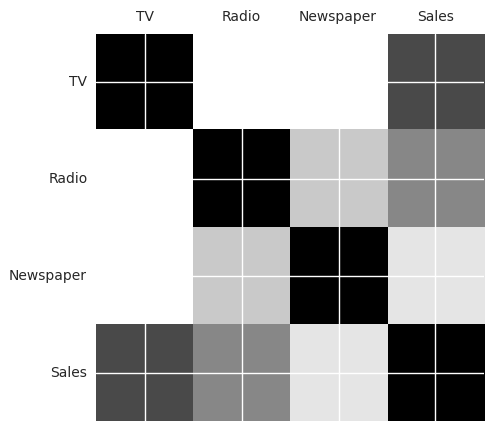

In [146]:
plot_corr(df)

### Check Data types (Make every column numeric)

In [133]:
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


### Visualizing data using SEABORN 

In [134]:
import seaborn as sns

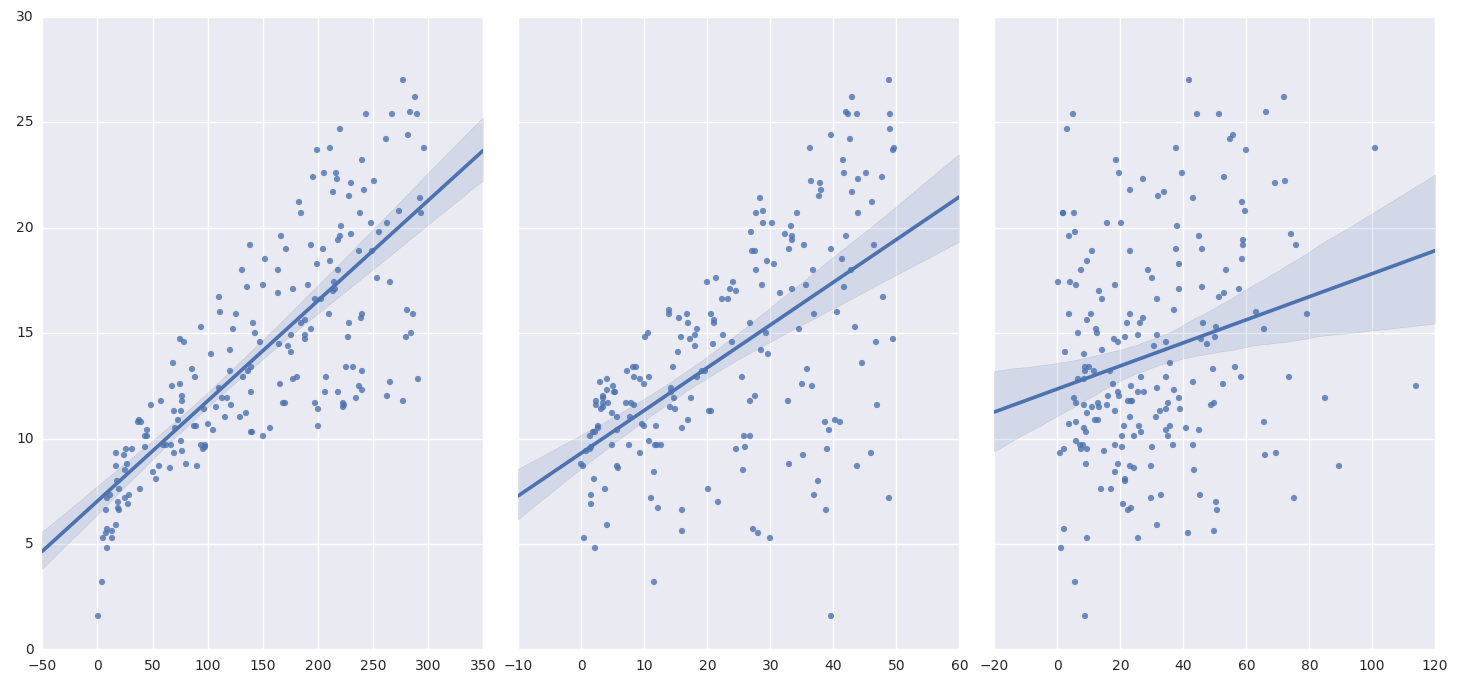

In [135]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'], size = 7, aspect = 0.7, kind='reg')

### Training the Model 

#### Splitting the data

70% for training, 30% for testing

In [136]:
from sklearn.model_selection import train_test_split

feature_col_names = ['TV','Radio','Newspaper']
predict_col_names = ['Sales']

X = df[feature_col_names].values
y = df[predict_col_names].values

split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

We check to ensure we have the desired 70% training, 30% test of the data

In [137]:
print("{0:.2f}% in training set".format(len(X_train)/ len(X) * 100))
print("{0:.2f}% in test set".format(len(y_test)/ len(X) * 100))

70.00% in training set
30.00% in test set


#### We check Hidden missing values

In [138]:
print("# rows in datafram {0}".format(len(df)))
print("# rows missing TV: {}".format(len(df.loc[df['TV'] == 0])))
print("# rows missing TV: {}".format(len(df.loc[df['Radio'] == 0])))
print("# rows missing TV: {}".format(len(df.loc[df['Newspaper'] == 0])))

# rows in datafram 200
# rows missing TV: 0
# rows missing TV: 1
# rows missing TV: 0


We usually need a domain expert to fix missing values!!!

Missing Data
Common Problem

Optioins
- Ignore
- Drop observations (rows)
- Replace values (Impute)  
    Imputing Options
    - Replace with mean, median
    - Replace with expert knowledge derived value (This is a BETTER option)

#### Training Initial Algorithm - Linear Regression 

In [139]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(n_jobs=-1) # n_jobs=-1 uses the all possible cores of the system
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

#### Interpreting Model coefficients 

In [140]:
print("y intercept: {0}".format(lr_model.intercept_))
print("Slopes/coeficient: {0}".format(list(zip(feature_col_names ,lr_model.coef_[0]))))

y intercept: [ 2.70894909]
Slopes/coeficient: [('TV', 0.044059280957465162), ('Radio', 0.19928749689893935), ('Newspaper', 0.0068824522222754453)]


y = 2.88 + 0.0466 × TV + 0.179 × Radio + 0.00345 × Newspaper

How do we interpret the TV coefficient (0.0466)?
- For a given amount of Radio and Newspaper ad spending, a "unit" a "unit"
increase in TV ad spending increase in TV ad spending is associated with a 0.0466 "unit" 0.0466 "unit"
increase in Sales increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad
spending, an additional $1,000 spent on TV ads an additional $1,000 spent on TV ads is associated
with an increase in sales of 46.6 items increase in sales of 46.6 items

Important notes:
- This is a statement of association association, not causation causation.
- If an increase in TV ad spending was associated with a decrease decrease in
sales, would be negative negative.

### Model evaluation metrics for Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy accuracy, are
not useful for regression problems. Instead, we need evaluation metrics
designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three
common evaluation metrics common evaluation metrics for regression problems:

Comparing these metrics
- MAE  is the mean of the absolute value of the errors: is the easiest to understand, because it's the average error. https://en.wikipedia.org/wiki/Mean_absolute_error
- MSE  is the mean of the squared errors: is more popular than MAE, because MSE "punishes" largererrors. https://en.wikipedia.org/wiki/Mean_squared_error
- RMSE is the square root of the mean of the squared errors: is even more popular than MSE, because RMSE isinterpretable in the "y" units.

#### Performance on Training Data

In [141]:
# predict values using training data
lr_predict_train = lr_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics
import numpy as np

print("MAE in training set : {0}".format(metrics.mean_absolute_error(y_train, lr_predict_train)))
print("MSE in training set : {0}".format(metrics.mean_squared_error(y_train, lr_predict_train)))
print("RMSE in training set: {0}".format(np.sqrt(metrics.mean_squared_error(y_train, lr_predict_train))))

MAE in training set : 1.1581502948072528
MSE in training set : 2.4793551789057875
RMSE in training set: 1.5745968305905444


#### Performance on Test Data 

In [142]:
lr_predict_test = lr_model.predict(X_test)

print("MAE in training set : {0}".format(metrics.mean_absolute_error(y_test, lr_predict_test)))
print("MSE in training set : {0}".format(metrics.mean_squared_error(y_test, lr_predict_test)))
print("RMSE in training set: {0}".format(np.sqrt(metrics.mean_squared_error(y_test, lr_predict_test))))

MAE in training set : 1.511669222454908
MSE in training set : 3.796797236715219
RMSE in training set: 1.9485372043446385


#### Feature selection
Does Newspaper Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it remove it from the model and check the RMSE!

In [143]:
# create a list features names except NEWSPAPER
feature_col_names = ['TV','Radio']

# selected preferred features values
X = df[feature_col_names].values

# predict values 
y = df[predict_col_names].values

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=split_test_size)

# fit the model
lr_model_feature_selection = LinearRegression(n_jobs=-1)
lr_model_feature_selection.fit(X_train,y_train)

# make prediction on testing set
lr_predict_test_feature_selection = lr_model_feature_selection.predict(X_test)
print("RMSE in test set: {0}".format(np.sqrt(metrics.mean_squared_error(y_test, lr_predict_test_feature_selection))))

RMSE in test set: 1.9154756731764258


The RMSE decreased decreased when we removed Newspaper from the model.
(Error is something we want to minimize, so a lower number for a lower number for
RMSE is better RMSE is better.) Thus, it is unlikely that this feature is useful for
predicting Sales, and should be removed from the model